# Exploring the ONC Oceans 2.0 API

Via the Python client library
([PyPI](https://pypi.python.org/pypi/onc), 
[docs](https://wiki.oceannetworks.ca/display/O2A/Python+Client+Library))

In [44]:
import os
from pprint import pprint

import pandas
import xarray

In [47]:
%matplotlib inline

## Oceans 2.0 API Web Services Class

In [2]:
from onc.onc import ONC

Access to the ONC web services requires a user token which you can generate on the Web Services API tab of your 
[ONC account profile page](https://dmas.uvic.ca/Login). 
I have stored mine in an environment variable so as not to publish it to the world in this notebook.

In [5]:
TOKEN = os.environ['ONC_USER_TOKEN']

In [6]:
onc = ONC(TOKEN)

### Location Discovery

In [7]:
locations = onc.getLocations()
pprint(locations[0])

/media/doug/warehouse/conda_envs/onc-api-lab/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'bbox': {'maxDepth': -49.0,
          'maxLat': 48.38978,
          'maxLon': -123.4875,
          'minDepth': -49.0,
          'minLat': 48.38978,
          'minLon': -123.4875},
 'dataSearchURL': 'http://data.oceannetworks.ca/DataSearch?location=ALBH',
 'deployments': 2,
 'depth': -49.0,
 'description': 'Description:Albert Head (Metchosen) is one of the Earthquake '
                'Early Warning sites. It has a latitude of 48.3897 and a '
                'longitude of -123.4875 with an elevation of approximately 49 '
                'metres. ',
 'hasDeviceData': 'true',
 'hasPropertyData': 'false',
 'lat': 48.38978,
 'locationCode': 'ALBH',
 'locationName': 'Albert Head',
 'lon': -123.4875}


Each location is a `dict`.

It's odd that `getLocations()` raises the `InsecureRequestWarning` exceptions from `urllib3` but the other methods below don't.

A big list of location codes and descriptions:

In [8]:
for location in locations:
    print(
        f'locationCode: {location["locationCode"]}\n'
        f'description: {location["description"]}\n'
    )

locationCode: ALBH
description: Description:Albert Head (Metchosen) is one of the Earthquake Early Warning sites. It has a latitude of 48.3897 and a longitude of -123.4875 with an elevation of approximately 49 metres. 

locationCode: ARG
description: Platform: Remotely Operated Vehicle operated by Ocean Exploration Trust. It is a support vehicle to Hercules.  

locationCode: AS04
description: Depth: 121 m Latitude:48.300556 Longitude: -123.390944 Type: Platform Description: Autonomous mooring deployed with Current Meter, Conductivity Temperature Depth, and VEMCO fish receiver.'

locationCode: BACAX
description: Depth: 985 m Latitude: 48.3167 Longitude: -126.0501 Type: Stationary platform Description: Canyon axis: benthic processes, biodiversity, sediment dynamics.

locationCode: BACCC.A1
description: Depth: 824 m Latitude: 48.3098 Longitude: -126.0621 Type: Autonomous platform Description: Boundary layer flow near steep bathymetry, interaction of currents and deep-sea corals.

location

The `filters dict` arg allows specific locations or groups of locations to be returned:

In [9]:
pprint(onc.getLocations({'locationCode': 'TWDP'}))

/media/doug/warehouse/conda_envs/onc-api-lab/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[{'bbox': {'maxDepth': 3.0,
           'maxLat': 49.184813,
           'maxLon': -123.70004,
           'minDepth': 3.0,
           'minLat': 49.184813,
           'minLon': -123.70004},
  'dataSearchURL': 'http://data.oceannetworks.ca/DataSearch?location=TWDP',
  'deployments': 53,
  'depth': 3.0,
  'description': 'Description: Ferry Route that travels between Tsawwassen '
                 'terminal in Vancouver, BC and the Duke Point terminal, '
                 'Nanaimo BC.',
  'hasDeviceData': 'true',
  'hasPropertyData': 'false',
  'lat': 49.184813,
  'locationCode': 'TWDP',
  'locationName': 'Tsawwassen - Duke Point',
  'lon': -123.70004}]


It would be nice if there was a "fuzzy" way of finding locations.
I know that `TWDP` is the code for the Tsawwassen/Duke Point ferry,
but how would I find that out if all I knew that there is an instrumented
ferry that operates between those 2 terminals?

### Device Discovery

In [10]:
pprint(onc.getDevices({'locationCode': 'TWDP'}))

[{'cvTerm': {'device': []},
  'dataRating': [{'dateFrom': '2006-12-12T00:00:00.000Z',
                  'dateTo': '2015-01-06T23:23:45.000Z',
                  'samplePeriod': 3600.0,
                  'sampleSize': 1},
                 {'dateFrom': '2015-01-06T23:23:45.000Z',
                  'dateTo': '2017-03-14T18:18:55.000Z',
                  'samplePeriod': 10.0,
                  'sampleSize': 0},
                 {'dateFrom': '2017-03-14T18:18:55.000Z',
                  'dateTo': None,
                  'samplePeriod': 1.0,
                  'sampleSize': 1}],
  'deviceCode': 'AandOpt0418',
  'deviceId': 29,
  'deviceLink': 'http://data.oceannetworks.ca/DeviceListing?DeviceId=29',
  'deviceName': 'Aanderaa Optode 3835 (S/N 418)',
  'hasDeviceData': True},
 {'cvTerm': {'device': []},
  'dataRating': [{'dateFrom': '2013-11-15T00:00:00.000Z',
                  'dateTo': '2017-06-22T00:00:00.000Z',
                  'samplePeriod': 10.0,
                  'sampleSize': 0},
     

### Device Categories Discovery

In [12]:
pprint(onc.getDeviceCategories({'locationCode': 'TWDP'}))

[{'cvTerm': {'deviceCategory': [{'uri': 'http://vocab.nerc.ac.uk/collection/L05/current/102/',
                                 'vocabulary': 'SeaDataNet device '
                                               'categories'}]},
  'description': 'Barometric Pressure Sensor',
  'deviceCategoryCode': 'BARPRESS',
  'deviceCategoryName': 'Barometric Pressure Sensor',
  'hasDeviceData': 'true',
  'longDescription': ' Barometric pressure sensors are used to monitor weather '
                     'conditions at Ocean Networks Canada shore stations. In '
                     'addition to oceanographic sensors, measurements from '
                     'instruments above the surface of the ocean are useful to '
                     'discover interactions between the atmosphere and '
                     'hydrosphere.'},
 {'cvTerm': {'deviceCategory': [{'uri': 'http://vocab.nerc.ac.uk/collection/L05/current/351/',
                                 'vocabulary': 'SeaDataNet device '
                 

In [14]:
pprint(onc.getDeviceCategories({'locationCode': 'SCVIP'}))

[{'cvTerm': {'deviceCategory': [{'uri': 'http://vocab.nerc.ac.uk/collection/L05/current/115/',
                                 'vocabulary': 'SeaDataNet device '
                                               'categories'}]},
  'description': '150 kHz Acoustic Doppler Current Profiler',
  'deviceCategoryCode': 'ADCP150KHZ',
  'deviceCategoryName': 'ADCP 150 kHz',
  'hasDeviceData': 'true',
  'longDescription': ' Acoustic Doppler Current Profilers (ADCP) are '
                     'hydroacoustic instruments, similar to sonars. ADCPs use '
                     'the Doppler effect of sound waves that are scattered by '
                     'particles in seawater over a depth range. The travelling '
                     'time of sound waves gives an estimate of distance, and '
                     'the increase (blue shift) or decrease (red shift) in '
                     'frequency is converted into water current velocities.  '
                     'RDI Teledyne Acoustic Doppler current

### Data Products Discovery

In [15]:
pprint(onc.getDataProducts({'locationCode': 'TWDP'}))

[{'dataProductCode': 'LF',
  'dataProductName': 'Log File',
  'extension': 'txt',
  'hasDeviceData': True,
  'hasPropertyData': False,
  'helpDocument': 'https://wiki.oceannetworks.ca/display/DP/4'},
 {'dataProductCode': 'MSQAQCR',
  'dataProductName': 'Manual Scalar QAQC Results',
  'extension': 'qaqc',
  'hasDeviceData': True,
  'hasPropertyData': False,
  'helpDocument': 'https://wiki.oceannetworks.ca/display/DP/106'},
 {'dataProductCode': 'SRTS',
  'dataProductName': 'Satlantic Radiometer Time Series',
  'extension': 'raw',
  'hasDeviceData': True,
  'hasPropertyData': False,
  'helpDocument': 'https://wiki.oceannetworks.ca/display/DP/27'},
 {'dataProductCode': 'SSP',
  'dataProductName': 'Spatial Scalar Plot',
  'extension': 'pdf',
  'hasDeviceData': True,
  'hasPropertyData': True,
  'helpDocument': 'https://wiki.oceannetworks.ca/display/DP/91'},
 {'dataProductCode': 'SSP',
  'dataProductName': 'Spatial Scalar Plot',
  'extension': 'png',
  'hasDeviceData': True,
  'hasPropertyDa

### Scalar Data

In [16]:
onc.getDirectScalar({'locationCode': 'TWDP','deviceCategoryCode': 'TSG'})

{'next': None,
 'queryUrl': 'https://data.oceannetworks.ca/api/scalardata?locationCode=TWDP&deviceCategoryCode=TSG&method=getByLocation&token=c9575e02-bd27-4b77-b6d1-a98baa458624',
 'sensorData': [{'data': {'qaqcFlags': [1],
    'sampleTimes': ['2018-02-23T21:44:19.646Z'],
    'values': [2.826]},
   'sensorCode': 'Conductivity',
   'sensorName': 'Conductivity',
   'unitOfMeasure': 'S/m'},
  {'data': {'qaqcFlags': [1],
    'sampleTimes': ['2018-02-23T21:44:20.646Z'],
    'values': [27.2452]},
   'sensorCode': 'salinity',
   'sensorName': 'Practical Salinity',
   'unitOfMeasure': 'psu'},
  {'data': {'qaqcFlags': [1],
    'sampleTimes': ['2018-02-23T21:44:19.646Z'],
    'values': [7.1636]},
   'sensorCode': 'Temperature',
   'sensorName': 'Temperature',
   'unitOfMeasure': 'C'}]}

It's nice that there is a quick way to get the most recent readings.

The code example in the docs
("Example - Print the last Thermosalinograph reading from Tswwassen - Duke Point Ferry")
is Matlab, not Python.

There doesn't seem to be a way of filtering by `sensorCode`.

`begin` and `end` filter keys allow time slicing
(subject to a max 100,000 "row" limit per request):

In [17]:
pprint(
    onc.getDirectScalar(
        {
            'locationCode': 'TWDP',
            'deviceCategoryCode': 'TSG',
            'begin': '2018-02-19T00:00:00.000Z',
            'end': '2018-02-19T00:00:10.000Z',
        })
)

{'next': {'parameters': {'begin': '2018-02-19T00:00:10.512Z',
                         'deviceCategoryCode': 'TSG',
                         'end': '2018-02-19T00:00:10.000Z',
                         'locationCode': 'TWDP',
                         'method': 'getByLocation',
                         'token': 'c9575e02-bd27-4b77-b6d1-a98baa458624'},
          'url': 'https://data.oceannetworks.ca/api/scalardata?method=getByLocation&end=2018-02-19T00%3A00%3A10.000Z&locationCode=TWDP&deviceCategoryCode=TSG&begin=2018-02-19T00%3A00%3A10.512Z&token=c9575e02-bd27-4b77-b6d1-a98baa458624'},
 'queryUrl': 'https://data.oceannetworks.ca/api/scalardata?locationCode=TWDP&deviceCategoryCode=TSG&begin=2018-02-19T00%3A00%3A00.000Z&end=2018-02-19T00%3A00%3A10.000Z&method=getByLocation&token=c9575e02-bd27-4b77-b6d1-a98baa458624',
 'sensorData': [{'data': {'qaqcFlags': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          'sampleTimes': ['2018-02-19T00:00:00.511Z',
                                  

Scalar data from an ADCP obviously does not include velocity components:

In [18]:
onc.getDirectScalar({'locationCode': 'SCVIP','deviceCategoryCode': 'ADCP150KHZ'})

{'next': None,
 'queryUrl': 'https://data.oceannetworks.ca/api/scalardata?locationCode=SCVIP&deviceCategoryCode=ADCP150KHZ&method=getByLocation&token=c9575e02-bd27-4b77-b6d1-a98baa458624',
 'sensorData': [{'data': {'qaqcFlags': [1],
    'sampleTimes': ['2018-02-23T21:44:51.095Z'],
    'values': [236.3]},
   'sensorCode': 'magnetic_heading',
   'sensorName': 'Magnetic Compass Heading',
   'unitOfMeasure': 'deg'},
  {'data': {'qaqcFlags': [1],
    'sampleTimes': ['2018-02-23T21:44:51.095Z'],
    'values': [0.14]},
   'sensorCode': 'pitch',
   'sensorName': 'Pitch',
   'unitOfMeasure': 'deg'},
  {'data': {'qaqcFlags': [1],
    'sampleTimes': ['2018-02-23T21:44:51.095Z'],
    'values': [298.395]},
   'sensorCode': 'pressure',
   'sensorName': 'Pressure',
   'unitOfMeasure': 'decibar'},
  {'data': {'qaqcFlags': [1],
    'sampleTimes': ['2018-02-23T21:44:51.095Z'],
    'values': [-0.08]},
   'sensorCode': 'roll',
   'sensorName': 'Roll',
   'unitOfMeasure': 'deg'},
  {'data': {'qaqcFlags': [

### Data Product Downloading

The `outPath` argument to the constructor is required to set the destination path for downloaded files.

In [9]:
onc = ONC(TOKEN, outPath='/tmp/onc-api/')

The "all singing, all dancing" method is `orderDataProduct()`.
It:
 * requests the data product, which may result in estimates of download size and time
 * runs the data product request, which launches a process on the ONC task machine to generate the data product
 * poll the service until the data product is ready, reporting on progress, and download the product files to `outPath`

Here is the example from the client library docs:

In [22]:
onc.orderDataProduct({
    'locationCode':'BACAX',
    'deviceCategoryCode':'ADCP2MHZ',
    'dataProductCode':'TSSD',
    'extension':'csv',
    'begin':'2016-07-27T00:00:00.000Z',
    'end':'2016-08-01T00:00:00.000Z',
    'dpo_qualityControl':1,
    'dpo_resample':'none',
    'dpo_dataGaps':0,
})

Request Id: 2741084
Estimated File Size: 11 MB
Estimated Processing Time: 20 s
  Querying data: 0% of time range completed.

  Data product complete, running metadata.  Downloading meta/1 'BarkleyCanyon_Axis_ADCP2MHz_20160727T000007Z_20160731T235957Z-clean_CSV_META.pdf' (26.43 KB)
  2 files (3.65 MB) downloaded
Actual Processing/Download Time: 0:0:18.91


{'downloadResults': [{'downloaded': True,
   'downloadingTime': 1.006035,
   'file': '/tmp/onc-api//BarkleyCanyon_Axis_ADCP2MHz_20160727T000007Z_20160731T235957Z-clean.csv',
   'index': 1,
   'message': ['Querying data: 0% of time range completed.'],
   'queuingTime': 0,
   'requestCount': 2,
   'runningTime': 5.587435,
   'size': 3802024.0,
   'status': 'complete',
   'transferringTime': 0,
   'url': 'http://data.oceannetworks.ca/api/dataProductDelivery?method=download&token=c9575e02-bd27-4b77-b6d1-a98baa458624&dpRunId=6243436&index=1'},
  {'downloaded': True,
   'downloadingTime': 0.810942,
   'file': '/tmp/onc-api//BarkleyCanyon_Axis_ADCP2MHz_20160727T000007Z_20160731T235957Z-clean_CSV_META.pdf',
   'index': 'meta',
   'message': [],
   'queuingTime': 0,
   'requestCount': 1,
   'runningTime': 0,
   'size': 27065.0,
   'status': 'complete',
   'transferringTime': 0,
   'url': 'http://data.oceannetworks.ca/api/dataProductDelivery?method=download&token=c9575e02-bd27-4b77-b6d1-a98baa45

In [32]:
ls /tmp/onc-api/

BarkleyCanyon_Axis_ADCP2MHz_20160727T000007Z_20160731T235957Z-clean.csv
BarkleyCanyon_Axis_ADCP2MHz_20160727T000007Z_20160731T235957Z-clean_CSV_META.pdf


In [50]:
!head -60 /tmp/onc-api/BarkleyCanyon_Axis_ADCP2MHz_20160727T000007Z_20160731T235957Z-clean.csv

## BEGIN HEADER
#
##------------------------------------------------------------------------------
## Origin Section - more information in Metadata file or Oceans 2.0
##------------------------------------------------------------------------------
#SOURCE:   "Ocean Networks Canada Data Archive"  / Citation Author
#HTTP:      http://www.oceannetworks.ca          / Citation Publication Site
#HOME:     "University of Victoria, Canada"      / Citation Publication Location
#FLDATE:    2018-03-06T18:42:36.889Z  / File Creation Date = Date for Citation
#CITATION: "Ocean Networks Canada Data Archive, http://www.oceannetworks.ca, ADCP 2 MHz data from 27-31 Jul 2016, University of Victoria, Canada, Downloaded on 6 Mar 2018"  / Citation Title
#METADATF:  BarkleyCanyon_Axis_ADCP2MHz_20160727T000007Z_20160731T235957Z-clean_CSV_META.pdf  / Metadata file name
#SEARCHID:  6243436                              / DMAS Search ID from Oceans2.0
#
##----------------------------------------------------------

But that's ADCP scalar data, not velocity component time series!!

Check what data products are available:

In [27]:
onc.getDataProducts({
    'locationCode': 'BACAX',
    'deviceCategoryCode':'ADCP2MHZ',
})

[{'dataProductCode': 'LF',
  'dataProductName': 'Log File',
  'extension': 'txt',
  'hasDeviceData': True,
  'hasPropertyData': False,
  'helpDocument': 'https://wiki.oceannetworks.ca/display/DP/4'},
 {'dataProductCode': 'MSQAQCR',
  'dataProductName': 'Manual Scalar QAQC Results',
  'extension': 'qaqc',
  'hasDeviceData': True,
  'hasPropertyData': False,
  'helpDocument': 'https://wiki.oceannetworks.ca/display/DP/106'},
 {'dataProductCode': 'NDCP',
  'dataProductName': 'Nortek Daily Currents Plot',
  'extension': 'pdf',
  'hasDeviceData': True,
  'hasPropertyData': False,
  'helpDocument': 'https://wiki.oceannetworks.ca/display/DP/49'},
 {'dataProductCode': 'NDCP',
  'dataProductName': 'Nortek Daily Currents Plot',
  'extension': 'png',
  'hasDeviceData': True,
  'hasPropertyData': False,
  'helpDocument': 'https://wiki.oceannetworks.ca/display/DP/49'},
 {'dataProductCode': 'NTS',
  'dataProductName': 'Nortek Time Series',
  'extension': 'mat',
  'hasDeviceData': True,
  'hasProperty

Now, try for velocity component data as netCDF, and without metadata:

In [42]:
onc.orderDataProduct({
    'locationCode':'BACAX',
    'deviceCategoryCode':'ADCP2MHZ',
    'dataProductCode':'NTS',
    'extension':'nc',
    'begin':'2016-07-27T00:00:00.000Z',
    'end':'2016-08-01T00:00:00.000Z',
    'dpo_ensemblePeriod': 600,
    'dpo_velocityBinmapping': 2 
}, includeMetadataFile=False)

Request Id: 2745048
Estimated File Size: No estimated file size available.
  Running.
  Running... working on time range 1 of 1, for device deployment 1 of 1...
  Running... 5000 lines read so far, working at time 20160727T135317.
  Running... writing out data after end of raw file reached at time 20160727T235957.....
  Running... completed 1 of 5 files for deployment 1 of 1....
  Running... 5000 lines read so far, working at time 20160728T135317.
  Running... writing out data after end of raw file reached at time 20160728T235957.....
  Running... completed 3 of 5 files for deployment 1 of 1....
  Running... 5000 lines read so far, working at time 20160730T135317.
  Running... writing out data after end of raw file reached at time 20160730T235957....
  Running... completed 4 of 5 files for deployment 1 of 1.

  Data product complete, running metadata....  5 files (30.67 MB) downloaded
Actual Processing/Download Time: 0:1:48.65


{'downloadResults': [{'downloaded': True,
   'downloadingTime': 1.33353,
   'file': '/tmp/onc-api//BarkleyCanyon_Axis_ADCP2MHz_20160727T000007Z_20160727T235957Z-binMapLinearInterp.nc',
   'index': 1,
   'message': ['Running',
    'Running... working on time range 1 of 1, for device deployment 1 of 1.',
    'Running... 5000 lines read so far, working at time 20160727T135317',
    'Running... writing out data after end of raw file reached at time 20160727T235957',
    'Running... completed 1 of 5 files for deployment 1 of 1.',
    'Running... 5000 lines read so far, working at time 20160728T135317',
    'Running... writing out data after end of raw file reached at time 20160728T235957',
    'Running... completed 3 of 5 files for deployment 1 of 1.',
    'Running... 5000 lines read so far, working at time 20160730T135317',
    'Running... writing out data after end of raw file reached at time 20160730T235957',
    'Running... completed 4 of 5 files for deployment 1 of 1.'],
   'queuingTim

In [43]:
ls /tmp/onc-api/

BarkleyCanyon_Axis_ADCP2MHz_20160727T000007Z_20160727T235957Z-binMapLinearInterp.nc
BarkleyCanyon_Axis_ADCP2MHz_20160727T000007Z_20160731T235957Z-clean.csv
BarkleyCanyon_Axis_ADCP2MHz_20160727T000007Z_20160731T235957Z-clean_CSV_META.pdf
BarkleyCanyon_Axis_ADCP2MHz_20160728T000007Z_20160728T235957Z-binMapLinearInterp.nc
BarkleyCanyon_Axis_ADCP2MHz_20160729T110817Z_20160729T110817Z-binMapLinearInterp.nc
BarkleyCanyon_Axis_ADCP2MHz_20160730T000007Z_20160730T235957Z-binMapLinearInterp.nc
BarkleyCanyon_Axis_ADCP2MHz_20160731T201817Z_20160731T201817Z-binMapLinearInterp.nc


In [45]:
ds = xarray.open_dataset('/tmp/onc-api/BarkleyCanyon_Axis_ADCP2MHz_20160727T000007Z_20160727T235957Z-binMapLinearInterp.nc')
ds

<xarray.Dataset>
Dimensions:    (depth: 102, latitude: 1, longitude: 1, time: 8640)
Coordinates:
  * time       (time) datetime64[ns] 2016-07-27T00:00:07.507995904 ...
  * depth      (depth) float32 981.8961 981.8818 981.86743 981.8531 ...
  * latitude   (latitude) float32 48.316597
  * longitude  (longitude) float32 -126.05078
Data variables:
    u          (time, depth) float64 ...
    v          (time, depth) float64 ...
    w          (time, depth) float64 ...
    pressure   (time) float64 ...
    temp       (time) float64 ...
Attributes:
    Conventions:                          CF-1.6
    title:                                Ocean Networks Canada Nortek Profil...
    institution:                          Ocean Networks Canada
    source:                               Nortek Profiler 2000 kHz
    history:                              data extracted from raw output, min...
    references:                           http://www.oceannetworks.ca/
    CREATION_DATE:                    

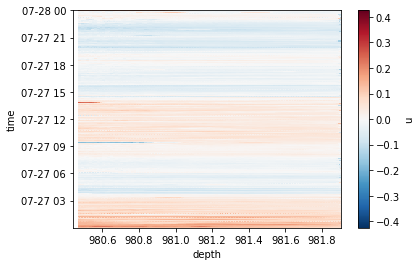

In [48]:
ds.u.plot()

Now try for SoG central node ADCP velocity component data:

In [49]:
onc.orderDataProduct(
    {
        'locationCode': 'SCVIP',
        'dataProductCode': 'RADCPTS',
        'deviceCategoryCode': 'ADCP150KHZ',
        'extension': 'nc',
        'begin': '2018-02-19T00:00:00.000Z',
        'end': '2018-02-19T00:02:00.000Z',
        'dpo_ensemblePeriod': 0,
        'dpo_velocityBinmapping': 2 
    }
)

Request Id: 2745389
Estimated File Size: 36 MB
Estimated Processing Time: 15 min
  Running
  2 files (90.73 KB) downloaded
Actual Processing/Download Time: 0:3:49.57


{'downloadResults': [{'downloaded': True,
   'downloadingTime': 0.803413,
   'file': '/tmp/onc-api//Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000001Z_20180219T000159Z-binMapLinearInterp.nc',
   'index': 1,
   'message': ['Running'],
   'queuingTime': 0,
   'requestCount': 2,
   'runningTime': 225.868559,
   'size': 65576.0,
   'status': 'complete',
   'transferringTime': 0,
   'url': 'http://data.oceannetworks.ca/api/dataProductDelivery?method=download&token=c9575e02-bd27-4b77-b6d1-a98baa458624&dpRunId=6247743&index=1'},
  {'downloaded': True,
   'downloadingTime': 0.561477,
   'file': '/tmp/onc-api//Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000001Z_20180219T000159Z_NC_META.pdf',
   'index': 'meta',
   'message': [],
   'queuingTime': 0,
   'requestCount': 1,
   'runningTime': 0,
   'size': 27329.0,
   'status': 'complete',
   'transferringTime': 0,
   'url': 'http://data.oceannetworks.ca/api/dataProductDelivery?method=download&token=c9

In [51]:
ls /tmp/onc-api/

BarkleyCanyon_Axis_ADCP2MHz_20160727T000007Z_20160727T235957Z-binMapLinearInterp.nc
BarkleyCanyon_Axis_ADCP2MHz_20160727T000007Z_20160731T235957Z-clean.csv
BarkleyCanyon_Axis_ADCP2MHz_20160727T000007Z_20160731T235957Z-clean_CSV_META.pdf
BarkleyCanyon_Axis_ADCP2MHz_20160728T000007Z_20160728T235957Z-binMapLinearInterp.nc
BarkleyCanyon_Axis_ADCP2MHz_20160729T110817Z_20160729T110817Z-binMapLinearInterp.nc
BarkleyCanyon_Axis_ADCP2MHz_20160730T000007Z_20160730T235957Z-binMapLinearInterp.nc
BarkleyCanyon_Axis_ADCP2MHz_20160731T201817Z_20160731T201817Z-binMapLinearInterp.nc
Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000001Z_20180219T000159Z-binMapLinearInterp.nc
Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000001Z_20180219T000159Z_NC_META.pdf


In [52]:
ds = xarray.open_dataset('/tmp/onc-api/Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000001Z_20180219T000159Z-binMapLinearInterp.nc')
ds

<xarray.Dataset>
Dimensions:    (depth: 85, latitude: 1, longitude: 1, time: 60)
Coordinates:
  * time       (time) datetime64[ns] 2018-02-19T00:00:01.600001280 ...
  * depth      (depth) float32 288.76 283.76 278.76 273.76 268.76 263.76 ...
  * latitude   (latitude) float32 49.040684
  * longitude  (longitude) float32 -123.42581
Data variables:
    u          (time, depth) float64 ...
    v          (time, depth) float64 ...
    w          (time, depth) float64 ...
    temp       (time) float64 ...
Attributes:
    Conventions:                             CF-1.6
    title:                                   Ocean Networks Canada RDI ADCP Data
    institution:                             Ocean Networks Canada
    source:                                  Fixed-position Teledyne-RDI ADCP...
    history:                                 data extracted from raw output, ...
    references:                              http://www.oceannetworks.ca/
    CREATION_DATE:                           20

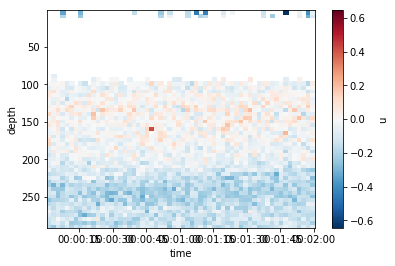

In [81]:
ds.u[:, ds.depth>0].transpose().plot(yincrease=False)

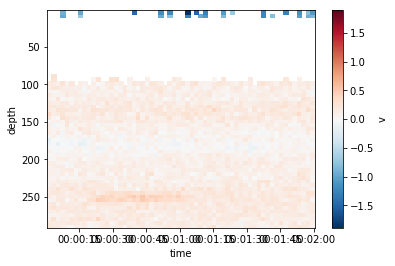

In [82]:
ds.v[:, ds.depth>0].transpose().plot(yincrease=False)

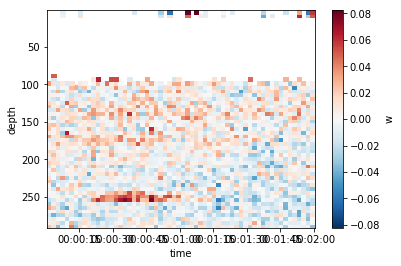

In [83]:
ds.w[:, ds.depth>0].transpose().plot(yincrease=False)

Hourly averaged for 1 recent day:

In [88]:
onc.orderDataProduct(
    {
        'locationCode': 'SCVIP',
        'dataProductCode': 'RADCPTS',
        'deviceCategoryCode': 'ADCP150KHZ',
        'extension': 'nc',
        'begin': '2018-02-19T00:00:00.000Z',
        'end': '2018-02-20T00:00:00.000Z',
        'dpo_ensemblePeriod': 3600,
        'dpo_velocityBinmapping': 2 
    }, includeMetadataFile=False
)

Request Id: 2746446
Estimated File Size: 28 kB
Estimated Processing Time: 20 min
  Running
  1 files (27.76 KB) downloaded
Actual Processing/Download Time: 0:5:4.35


{'downloadResults': [{'downloaded': True,
   'downloadingTime': 0.760459,
   'file': '/tmp/onc-api//Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000000Z_20180220T000000Z-Ensemble3600s_binMapLinearInterp.nc',
   'index': 1,
   'message': ['Running'],
   'queuingTime': 0,
   'requestCount': 2,
   'runningTime': 300.807323,
   'size': 28424.0,
   'status': 'complete',
   'transferringTime': 0,
   'url': 'http://data.oceannetworks.ca/api/dataProductDelivery?method=download&token=c9575e02-bd27-4b77-b6d1-a98baa458624&dpRunId=6248800&index=1'}],
 'stats': {'downloadingTime': 0.760459,
  'queuingTime': 0,
  'requestRequestTime': 1.015471,
  'runRequestTime': 2.106918,
  'runningTime': 300.807323,
  'transferringTime': 0}}

In [90]:
ls -lt /tmp/onc-api/

total 35324
-rw-r--r-- 1 doug doug    28424 Mar  6 13:15 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000000Z_20180220T000000Z-Ensemble3600s_binMapLinearInterp.nc
-rw-r--r-- 1 doug doug    27322 Mar  6 13:08 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000000Z_20180219T010000Z_NC_META.pdf
-rw-r--r-- 1 doug doug     4688 Mar  6 13:07 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000000Z_20180219T010000Z-Ensemble3600s_binMapLinearInterp.nc
-rw-r--r-- 1 doug doug    27329 Mar  6 12:43 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000001Z_20180219T000159Z_NC_META.pdf
-rw-r--r-- 1 doug doug    65576 Mar  6 12:43 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000001Z_20180219T000159Z-binMapLinearInterp.nc
-rw-r--r-- 1 doug doug     4772 Mar  6 12:31 BarkleyCanyon_Axis_ADCP2MHz_20160731T201817Z_20160731T201817Z-binMapLinearInterp.nc
-rw-r--r-- 1 doug doug 10717132 Mar  6 12:31 BarkleyCany

In [91]:
ds = xarray.open_dataset('/tmp/onc-api/Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000000Z_20180220T000000Z-Ensemble3600s_binMapLinearInterp.nc')
ds

<xarray.Dataset>
Dimensions:    (depth: 85, latitude: 1, longitude: 1, time: 24)
Coordinates:
  * time       (time) datetime64[ns] 2018-02-19T00:30:00.000003328 ...
  * depth      (depth) float32 288.76 283.76 278.76 273.76 268.76 263.76 ...
  * latitude   (latitude) float32 49.040684
  * longitude  (longitude) float32 -123.42581
Data variables:
    u          (time, depth) float64 ...
    v          (time, depth) float64 ...
    w          (time, depth) float64 ...
    temp       (time) float64 ...
Attributes:
    Conventions:                             CF-1.6
    title:                                   Ocean Networks Canada RDI ADCP Data
    institution:                             Ocean Networks Canada
    source:                                  Fixed-position Teledyne-RDI ADCP...
    history:                                 data extracted from raw output, ...
    references:                              http://www.oceannetworks.ca/
    CREATION_DATE:                           20

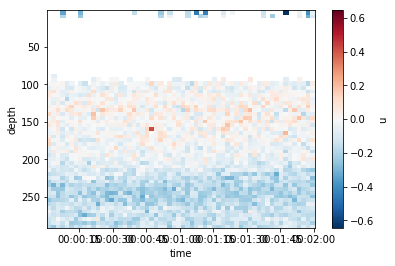

In [81]:
ds.u[:, ds.depth>0].transpose().plot(yincrease=False)

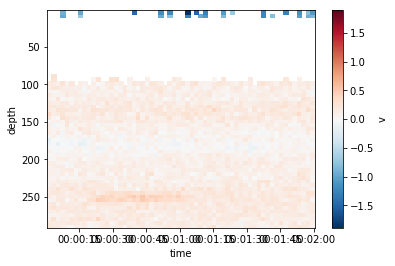

In [82]:
ds.v[:, ds.depth>0].transpose().plot(yincrease=False)

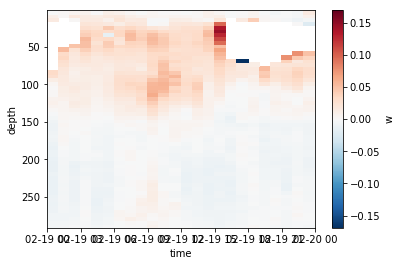

In [92]:
ds.w[:, ds.depth>0].transpose().plot(yincrease=False)

Hourly averaged for 1 day in 2013:

In [94]:
onc.orderDataProduct(
    {
        'locationCode': 'SCVIP',
        'dataProductCode': 'RADCPTS',
        'deviceCategoryCode': 'ADCP150KHZ',
        'extension': 'nc',
        'begin': '2013-06-29T00:00:00.000Z',
        'end': '2013-06-30T00:00:00.000Z',
        'dpo_ensemblePeriod': 3600,
        'dpo_velocityBinmapping': 2 
    }, includeMetadataFile=False
)

Request Id: 2747670
Estimated File Size: 28 kB
Estimated Processing Time: 20 min
  Running
  1 files (20.63 KB) downloaded
Actual Processing/Download Time: 0:5:4.19


{'downloadResults': [{'downloaded': True,
   'downloadingTime': 0.767432,
   'file': '/tmp/onc-api//Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20130629T000000Z_20130630T000000Z-Ensemble3600s_binMapLinearInterp.nc',
   'index': 1,
   'message': ['Running'],
   'queuingTime': 0,
   'requestCount': 2,
   'runningTime': 300.78431,
   'size': 21124.0,
   'status': 'complete',
   'transferringTime': 0,
   'url': 'http://data.oceannetworks.ca/api/dataProductDelivery?method=download&token=c9575e02-bd27-4b77-b6d1-a98baa458624&dpRunId=6250035&index=1'}],
 'stats': {'downloadingTime': 0.767432,
  'queuingTime': 0,
  'requestRequestTime': 1.037817,
  'runRequestTime': 2.165535,
  'runningTime': 300.78431,
  'transferringTime': 0}}

In [95]:
ls -lt /tmp/onc-api/

total 35348
-rw-r--r-- 1 doug doug    21124 Mar  6 13:58 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20130629T000000Z_20130630T000000Z-Ensemble3600s_binMapLinearInterp.nc
-rw-r--r-- 1 doug doug    28424 Mar  6 13:15 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000000Z_20180220T000000Z-Ensemble3600s_binMapLinearInterp.nc
-rw-r--r-- 1 doug doug    27322 Mar  6 13:08 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000000Z_20180219T010000Z_NC_META.pdf
-rw-r--r-- 1 doug doug     4688 Mar  6 13:07 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000000Z_20180219T010000Z-Ensemble3600s_binMapLinearInterp.nc
-rw-r--r-- 1 doug doug    27329 Mar  6 12:43 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000001Z_20180219T000159Z_NC_META.pdf
-rw-r--r-- 1 doug doug    65576 Mar  6 12:43 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000001Z_20180219T000159Z-binMapLinearInterp.nc
-rw-r--r-- 1

In [96]:
ds = xarray.open_dataset('/tmp/onc-api/Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20130629T000000Z_20130630T000000Z-Ensemble3600s_binMapLinearInterp.nc')
ds

<xarray.Dataset>
Dimensions:    (depth: 60, latitude: 1, longitude: 1, time: 24)
Coordinates:
  * time       (time) datetime64[ns] 2013-06-29T00:30:00.000003328 ...
  * depth      (depth) float32 290.73 285.73 280.73 275.73 270.73 265.73 ...
  * latitude   (latitude) float32 49.0402
  * longitude  (longitude) float32 -123.42603
Data variables:
    u          (time, depth) float64 ...
    v          (time, depth) float64 ...
    w          (time, depth) float64 ...
    temp       (time) float64 ...
Attributes:
    Conventions:                             CF-1.6
    title:                                   Ocean Networks Canada RDI ADCP Data
    institution:                             Ocean Networks Canada
    source:                                  Fixed-position Teledyne-RDI ADCP...
    history:                                 data extracted from raw output, ...
    references:                              http://www.oceannetworks.ca/
    CREATION_DATE:                           2018

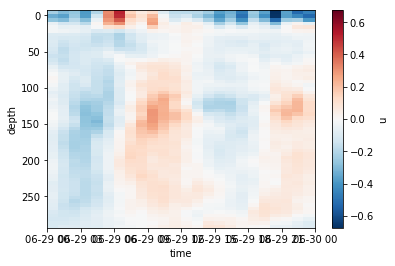

In [108]:
ds.u.transpose().plot(yincrease=False)

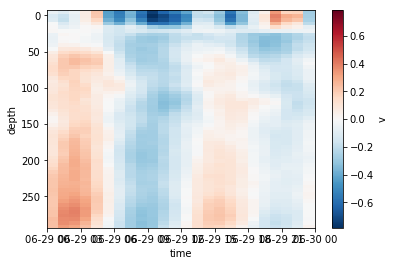

In [109]:
ds.v.transpose().plot(yincrease=False)

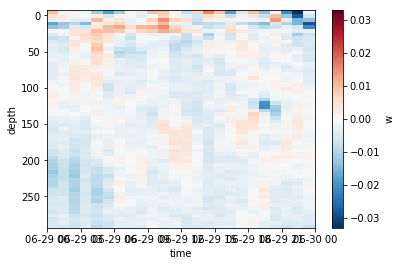

In [110]:
ds.w.transpose().plot(yincrease=False)

Now, let's break down the steps that `orderDataProduct()` does.

First, `requestDataProduct()` returns a dict of information about the data product request,
including a `requestId` that can be used for subsequent steps:

In [100]:
onc.requestDataProduct(
    {
        'locationCode': 'SCVIP',
        'dataProductCode': 'RADCPTS',
        'deviceCategoryCode': 'ADCP150KHZ',
        'extension': 'nc',
        'begin': '2013-06-29T00:00:00.000Z',
        'end': '2013-06-30T00:00:00.000Z',
        'dpo_ensemblePeriod': 3600,
        'dpo_velocityBinmapping': 2 
    }
)

{'disclaimer': 'Software Engineering is implementing estimates of processing times and file sizes for data requests. These are extremely rough to begin with, but bear with us. We expect these estimates will gradually improve.',
 'dpRequestId': 2747900,
 'estimatedFileSize': '28 kB',
 'estimatedProcessingTime': '20 min'}

Next, use the `dpRequestId` value to launch the server-side run(s) to prepare the requested data product.
A list of run ids that can be used for subsequenst steps is returned:

In [101]:
onc.runDataProduct(2747900)

[6250266]

Now, poll the data product delivery service until a product generation run is complete and download the files.
We'll exclude the metadata PDF file.

In [103]:
onc.downloadDataProduct(6250266, includeMetadataFile=False)

  Skipping 1 'Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20130629T000000Z_20130630T000000Z-Ensemble3600s_binMapLinearInterp.nc': File Already Exists
  1 files (20.63 KB) downloaded


[{'downloaded': True,
  'downloadingTime': 0.737785,
  'file': '/tmp/onc-api//Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20130629T000000Z_20130630T000000Z-Ensemble3600s_binMapLinearInterp.nc',
  'index': 1,
  'message': [],
  'queuingTime': 0,
  'requestCount': 1,
  'runningTime': 0,
  'size': 21124.0,
  'status': 'complete',
  'transferringTime': 0,
  'url': 'http://data.oceannetworks.ca/api/dataProductDelivery?method=download&token=c9575e02-bd27-4b77-b6d1-a98baa458624&dpRunId=6250266&index=1'}]

Alternatively, we can choose to receive only the run status, and the URL from which the resulting file can be downloaded:

In [104]:
onc.downloadDataProduct(6250266, includeMetadataFile=False, downloadResultsOnly=True)

  download URL: http://data.oceannetworks.ca/api/dataProductDelivery?method=download&token=c9575e02-bd27-4b77-b6d1-a98baa458624&dpRunId=6250266&index=1
  0 files (20.63 KB) downloaded


[{'downloaded': False,
  'downloadingTime': 0,
  'file': '/tmp/onc-api//Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20130629T000000Z_20130630T000000Z-Ensemble3600s_binMapLinearInterp.nc',
  'index': 1,
  'message': [],
  'queuingTime': 0,
  'requestCount': 1,
  'runningTime': 0,
  'size': 21124.0,
  'status': 'complete',
  'transferringTime': 0,
  'url': 'http://data.oceannetworks.ca/api/dataProductDelivery?method=download&token=c9575e02-bd27-4b77-b6d1-a98baa458624&dpRunId=6250266&index=1'}]

Having requested the results URL,
we can download it to the file path of our choice
instead of the directory we specified in the `ONC()` constructor
and the file name generated on the server:

In [106]:
onc.downloadFile(
    'http://data.oceannetworks.ca/api/dataProductDelivery?method=download&token=c9575e02-bd27-4b77-b6d1-a98baa458624&dpRunId=6250266&index=1',
    '/tmp/onc-api/foo.nc'
)

{'downloaded': True,
 'downloadingTime': 0.882294,
 'file': '/tmp/onc-api/foo.nc',
 'message': [],
 'size': 21124.0,
 'url': 'http://data.oceannetworks.ca/api/dataProductDelivery?method=download&token=c9575e02-bd27-4b77-b6d1-a98baa458624&dpRunId=6250266&index=1'}

In [107]:
ls -lt /tmp/onc-api/

total 35372
-rw-r--r-- 1 doug doug    21124 Mar  6 14:18 foo.nc
-rw-r--r-- 1 doug doug    21124 Mar  6 13:58 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20130629T000000Z_20130630T000000Z-Ensemble3600s_binMapLinearInterp.nc
-rw-r--r-- 1 doug doug    28424 Mar  6 13:15 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000000Z_20180220T000000Z-Ensemble3600s_binMapLinearInterp.nc
-rw-r--r-- 1 doug doug    27322 Mar  6 13:08 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000000Z_20180219T010000Z_NC_META.pdf
-rw-r--r-- 1 doug doug     4688 Mar  6 13:07 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000000Z_20180219T010000Z-Ensemble3600s_binMapLinearInterp.nc
-rw-r--r-- 1 doug doug    27329 Mar  6 12:43 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000001Z_20180219T000159Z_NC_META.pdf
-rw-r--r-- 1 doug doug    65576 Mar  6 12:43 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000001Z

In [111]:
onc.orderDataProduct(
    {
        'locationCode': 'SCVIP',
        'dataProductCode': 'RADCPTS',
        'deviceCategoryCode': 'ADCP150KHZ',
        'extension': 'nc',
        'begin': '2018-03-01T00:00:00.000Z',
        'end': '2018-03-02T00:00:00.000Z',
        'dpo_ensemblePeriod': 3600,
        'dpo_velocityBinmapping': 2 
    }, includeMetadataFile=False
)

Request Id: 2748969
Estimated File Size: 28 kB
Estimated Processing Time: 20 min
  Running
  1 files (27.76 KB) downloaded
Actual Processing/Download Time: 0:5:4.21


{'downloadResults': [{'downloaded': True,
   'downloadingTime': 0.771263,
   'file': '/tmp/onc-api//Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180301T000000Z_20180302T000000Z-Ensemble3600s_binMapLinearInterp.nc',
   'index': 1,
   'message': ['Running'],
   'queuingTime': 0,
   'requestCount': 2,
   'runningTime': 300.788758,
   'size': 28424.0,
   'status': 'complete',
   'transferringTime': 0,
   'url': 'http://data.oceannetworks.ca/api/dataProductDelivery?method=download&token=c9575e02-bd27-4b77-b6d1-a98baa458624&dpRunId=6251334&index=1'}],
 'stats': {'downloadingTime': 0.771263,
  'queuingTime': 0,
  'requestRequestTime': 0.98982,
  'runRequestTime': 1.98427,
  'runningTime': 300.788758,
  'transferringTime': 0}}

In [112]:
ls -lt /tmp/onc-api/

total 35400
-rw-r--r-- 1 doug doug    28424 Mar  6 14:43 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180301T000000Z_20180302T000000Z-Ensemble3600s_binMapLinearInterp.nc
-rw-r--r-- 1 doug doug    21124 Mar  6 14:18 foo.nc
-rw-r--r-- 1 doug doug    21124 Mar  6 13:58 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20130629T000000Z_20130630T000000Z-Ensemble3600s_binMapLinearInterp.nc
-rw-r--r-- 1 doug doug    28424 Mar  6 13:15 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000000Z_20180220T000000Z-Ensemble3600s_binMapLinearInterp.nc
-rw-r--r-- 1 doug doug    27322 Mar  6 13:08 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000000Z_20180219T010000Z_NC_META.pdf
-rw-r--r-- 1 doug doug     4688 Mar  6 13:07 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180219T000000Z_20180219T010000Z-Ensemble3600s_binMapLinearInterp.nc
-rw-r--r-- 1 doug doug    27329 Mar  6 12:43 Central_StraitofGeorgiaVENUSInstrumentPlatform_ADC

In [113]:
ds = xarray.open_dataset('/tmp/onc-api/Central_StraitofGeorgiaVENUSInstrumentPlatform_ADCP150kHz_20180301T000000Z_20180302T000000Z-Ensemble3600s_binMapLinearInterp.nc')
ds

<xarray.Dataset>
Dimensions:    (depth: 85, latitude: 1, longitude: 1, time: 24)
Coordinates:
  * time       (time) datetime64[ns] 2018-03-01T00:30:00.000003328 ...
  * depth      (depth) float32 288.76 283.76 278.76 273.76 268.76 263.76 ...
  * latitude   (latitude) float32 49.040684
  * longitude  (longitude) float32 -123.42581
Data variables:
    u          (time, depth) float64 ...
    v          (time, depth) float64 ...
    w          (time, depth) float64 ...
    temp       (time) float64 ...
Attributes:
    Conventions:                             CF-1.6
    title:                                   Ocean Networks Canada RDI ADCP Data
    institution:                             Ocean Networks Canada
    source:                                  Fixed-position Teledyne-RDI ADCP...
    history:                                 data extracted from raw output, ...
    references:                              http://www.oceannetworks.ca/
    CREATION_DATE:                           20

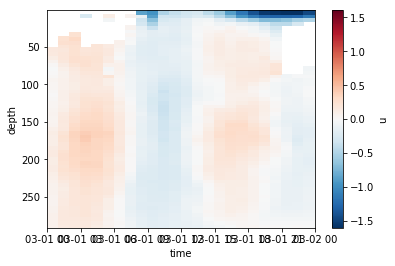

In [115]:
ds.u[:, ds.depth>=0].transpose().plot(yincrease=False)

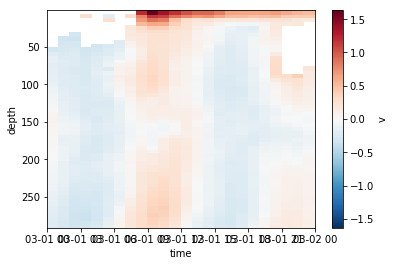

In [117]:
ds.v[:, ds.depth>=0].transpose().plot(yincrease=False)

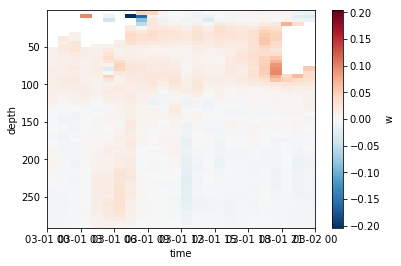

In [119]:
ds.w[:, ds.depth>=0].transpose().plot(yincrease=False)